In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings


In [2]:
# Load the dataset

Games_data= pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
cat=Games_data.select_dtypes(include="object").columns
cat

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')

In [4]:
Games_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Games_data.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            580
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [6]:
Games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
# checking the null values
Games_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
# Removing null values

Games_data = Games_data.dropna()

In [9]:
Games_data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [10]:
x = Games_data.drop(['Global_Sales'], axis = 1)
y = Games_data['Global_Sales'] # target variable

In [11]:
# Select columns to encode
columns_to_encode = ['Platform', 'Rating','Genre']


In [12]:
# Perform one hot encoding
one_hot_encoded = pd.get_dummies(Games_data[columns_to_encode])

In [13]:
# Combine one hot encoded columns with original data
data_encoded = pd.concat([Games_data, one_hot_encoded], axis=1)

In [14]:
# Remove original categorical columns
data_encoded.drop(Games_data[columns_to_encode], axis=1, inplace=True)

In [15]:
# View the encoded data
data_encoded.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,2006.0,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,...,0,0,0,0,0,0,0,0,1,0
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,...,0,0,0,0,0,0,0,0,1,0
6,New Super Mario Bros.,2006.0,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,...,0,0,1,0,0,0,0,0,0,0
7,Wii Play,2006.0,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
Games_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [17]:
# Drop rows with missing or invalid values in the "Global_Sales" column
Games_data = Games_data.dropna(subset=['Global_Sales'])
Games_data = Games_data[Games_data['Global_Sales'] != 'N/A']


In [18]:
 #Convert the "Global_Sales" column to a numeric datatype
Games_data['Global_Sales'] = pd.to_numeric(Games_data['Global_Sales'])


In [19]:
le = LabelEncoder()
Games_data['Name'] = le.fit_transform(Games_data['Name'])
Games_data['Platform'] = le.fit_transform(Games_data['Platform'])
Games_data['Genre'] = le.fit_transform(Games_data['Genre'])
Games_data['Publisher'] = le.fit_transform(Games_data['Publisher'])
Games_data['User_Score'] = le.fit_transform(Games_data['User_Score'])
Games_data['Developer'] = le.fit_transform(Games_data['Developer'])
Games_data['Rating'] = le.fit_transform(Games_data['Rating'])

In [20]:
le = LabelEncoder()
Games_data['Platform'] = Games_data['Platform'].astype(float)
Games_data['Genre'] = Games_data['Genre'].astype(float)
Games_data['Publisher'] = Games_data['Publisher'].astype(float)
Games_data['User_Score'] = Games_data['User_Score'].astype(float)
Games_data['Developer'] = Games_data['Developer'].astype(float)
Games_data['Rating'] = Games_data['Rating'].astype(float)

In [21]:
Games_data.dtypes

Name                 int64
Platform           float64
Year_of_Release    float64
Genre              float64
Publisher          float64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer          float64
Rating             float64
dtype: object

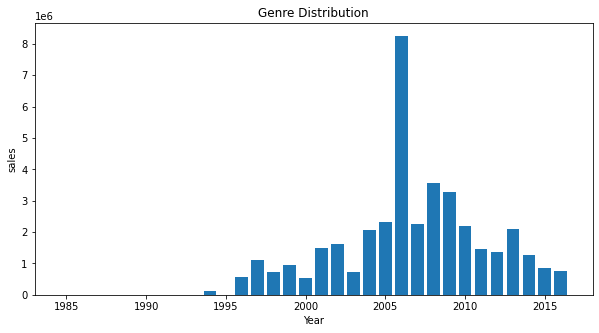

In [22]:
# plot for year vs sales
plt.figure(figsize=(10,5))
plt.bar(Games_data['Year_of_Release'],(Games_data['Global_Sales']*100000))
plt.title('Genre Distribution')
plt.xlabel('Year')
plt.ylabel('sales')
plt.show()

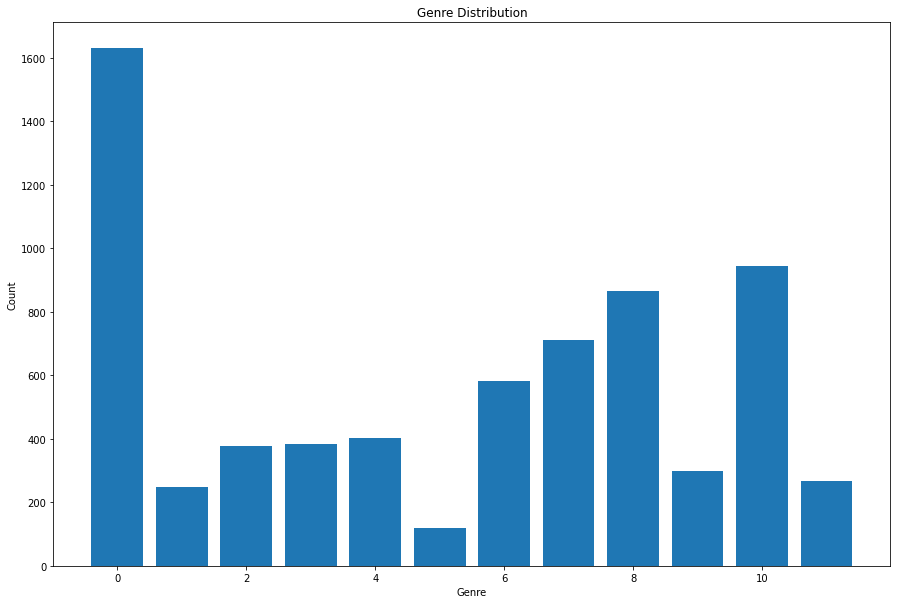

In [23]:
# polt for genre vs count
genre_counts=Games_data['Genre'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

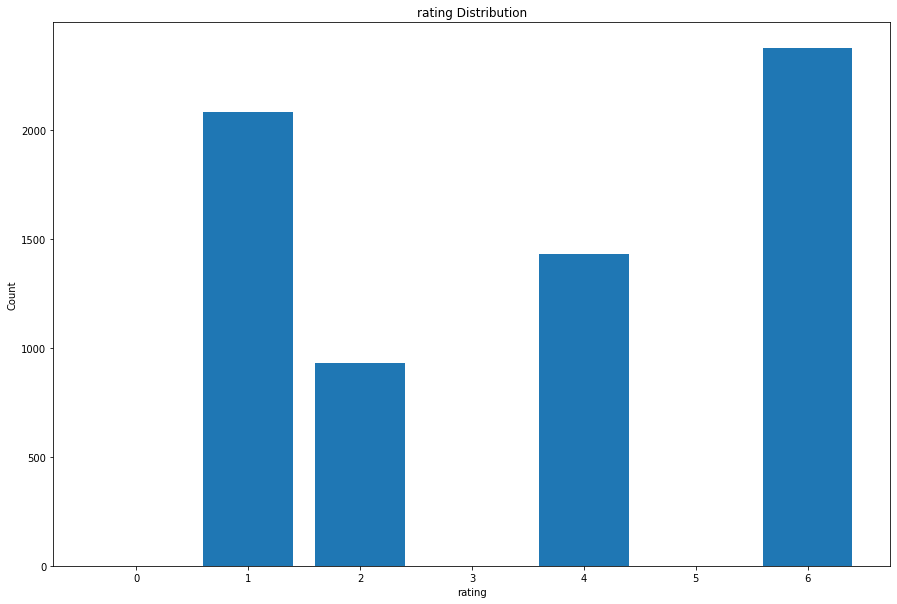

In [24]:
# plot  for Rating vs count
rating_count=Games_data['Rating'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(rating_count.index,rating_count.values)
plt.title('rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

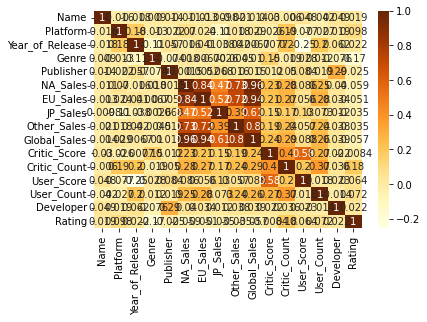

In [25]:
# Heatmap

sns.heatmap(Games_data.corr(), cmap = "YlOrBr", annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

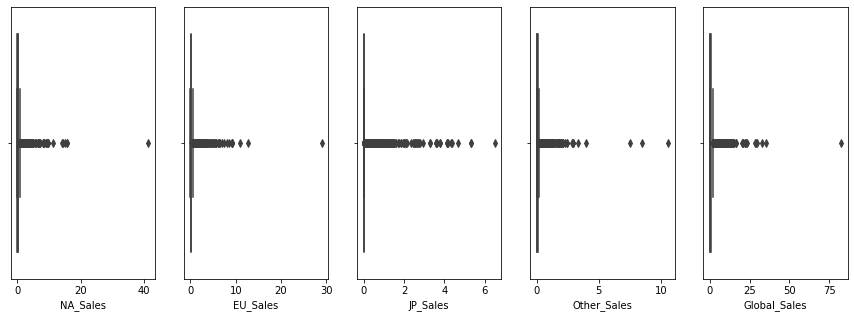

In [26]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
fig, axs = plt.subplots(ncols=len(cols), figsize=(15,5))
for i, col in enumerate(cols):
    sns.boxplot(x=Games_data[col], ax=axs[i])
plt.show

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [28]:
# Define the features and target variable
features = ['Genre', 'Platform', 'Publisher', 'Year_of_Release', 'Critic_Score', 'User_Score']
target = 'Global_Sales'


In [29]:
# Split data into feature and target variables
X = Games_data.drop(columns=['Global_Sales'])
y = Games_data['Global_Sales']

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train the decision tree regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model using R-squared and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared:', r2)
print('RMSE:', rmse)

R-squared: 0.96491174106757
RMSE: 0.30880094232048894


In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [35]:
# Create a Decision Tree Regression model
dtree_reg = DecisionTreeRegressor()


In [36]:
# Apply Grid Search Cross Validation to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]})

In [37]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_search.best_score_))


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}
Best Mean Cross-validation score: 0.87


In [38]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model using R-squared and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R-squared:', r2)
print('RMSE:', rmse)

R-squared: 0.96491174106757
RMSE: 0.30880094232048894


In [40]:
from scipy.stats import chi2_contingency

In [41]:
# Create a contingency table of two categorical variables
contingency_table = pd.crosstab(Games_data['Genre'], Games_data['Rating'])


In [42]:
# Perform the chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [43]:
# Print the results
print('Chi-square statistic:', chi2)

Chi-square statistic: 3993.75842859982
